# King County Housing Linear Regression Project


* Student name: Seyma Tas
* Student pace:  Full time
* Scheduled project review date/time: 05-04-2020
* Instructor name: Amber Yandow
* Blog post URL:


## OSEMN Approach
1 - Obtaining the data 2 - Scrubbing the data 3 - Exploring the data 4 - Modeling the data 5 - iNterpreting the results


![title](picture2.png)


## Questions:

1) What are the main factors to predict the price of a house?

2) How much does a middle income family should invest to buy a standard house?
   
   or What are the properties of a house you can buy in King County if your budget is $400,000???
    
3) How can a middle income family increase the price of their house by %20 by spending %5 of the house cost???

4) Basement
 

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
# # Print all the interactive output without resorting to print
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

## Import the necessary packages

First, we’ll import all of our necessary packages.

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
# import sklearn as sk 



In [4]:
# ## Display more information 
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

## Import the data set

Next, we’ll import our data and see what we’re working with. 

In [5]:
df=pd.read_csv('kc_house_data.csv')

Lets see what the data looks like by functions head(), tail(), shape(), info() and describe().

In [6]:
df.head()
df.tail()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [7]:
df.shape

(21597, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [9]:
df.describe().round(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,540296.6,3.4,2.1,2080.3,15099.4,1.5,0.0,0.2,3.4,7.7,1788.6,1971.0,83.6,98078.0,47.6,-122.2,1986.6,12758.3
std,2.876736e+09,367368.1,0.9,0.8,918.1,41412.6,0.5,0.1,0.8,0.7,1.2,827.8,29.4,399.9,53.5,0.1,0.1,685.2,27274.4
min,1.000102e+06,78000.0,1.0,0.5,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.2,-122.5,399.0,651.0
25%,2.123049e+09,322000.0,3.0,1.8,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,98033.0,47.5,-122.3,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.2,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,98065.0,47.6,-122.2,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.5,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,1997.0,0.0,98118.0,47.7,-122.1,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,47.8,-121.3,6210.0,871200.0


# Buraya describe ile ilgili yorum yaz
Most houses were build around 1975; sold for $450K; had square footage of living spaces around 1910. You can also note, that distributions of price and variables such as sqft_lot are skewed to the upper tail.



## Check the numbers of missing values

In [10]:
print(df.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


# Buraya na values  ile ilgili yorum yaz


# Drop unnecessary columns

In [11]:
df=df.drop(['id','date'],axis=1)

# Outliers

In [12]:
# df_filtered=df.drop(['sqft_basement' ], axis=1)

In [13]:
Q1 = df.quantile(0.005)
Q3 = df.quantile(0.98)
IQR = Q3 - Q1

df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

## Data cleaning
## Identifying Categorical Variables

These columns can be thought as categorical values. Bedrooms, bathrooms, floors, waterfront, wiev, grade, zipcode and year renovated.
Let's explore them one by one.

### View
It is unclear what this feature indicates because one source suggests it is whether the property has
been viewed and another suggests it is a measure of the quality of the view from the property. It has
values 0 to 4 but the vast majority (90.2%) of houses have a value of 0. 

### Therefore, since the meaning
of the feature is unclear and it has little differentiating power, it will be ignored in future analysis
and prediction.

Remember from earlier that "view- has been viewed" is the given column description. Well, I am not entirely certain what that means. I'm assuming that since there are only 5 options [0,1,2,3,4] that this is an oridinal feature/ category describing the quality of the view, or a water view. I am guessing this based on the graph above where I plotted the view in relation to the lattitude and longitude.

In [14]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [15]:
df['view'].isna().sum()

63

In [16]:
feats = ['view', 'waterfront']
df[feats].corr()

,view,waterfront
view,1.000000,0.406654
waterfront,0.406654,1.000000


In [17]:
print('Number missing both:',
      len(df[(df.view.isnull())
      & (df.waterfront.isnull())]))

Number missing both: 6


# waterfront ve view 

In [18]:
len(df[(df.view==2)&(df.waterfront.isna())])

121

In [19]:
len(df[(df.view==3)&(df.waterfront>0)])

14

In [20]:
df['view'].fillna(0,inplace=True)

In [21]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [22]:
df['waterfront'].isna().sum()

2376

In [23]:
df['waterfront'].fillna(0,inplace=True)

In [24]:
feats = ['view', 'waterfront']
df[feats].corr()

,view,waterfront
view,1.000000,0.380543
waterfront,0.380543,1.000000


In [25]:
# df.waterfront = df.waterfront.astype('category')
# df.condition = df.condition.astype('category')
# df.grade = df.grade.astype('category')
# df.view = df.view.astype('category')

In [26]:
len(df.query("sqft_basement == '?'"))

454

In [27]:
df.sqft_basement.replace(['?'], '0', inplace=True)

df.sqft_basement = df.sqft_basement.astype('float').astype('int')

#Replace ? with difference between sqft_above and sqft_living

df['sqft_basement'].replace(to_replace='?', value = abs(df['sqft_above']-df['sqft_living']), inplace=True)

df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

df['sqft_basement'].dtype

df = df.drop(["sqft_living"], axis=1)

In [28]:
df.yr_renovated.value_counts()


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [29]:
df.yr_renovated.isna().sum()


3842

In [30]:
df.yr_renovated.value_counts()


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [31]:
df.yr_renovated = df.yr_renovated.fillna(0)

In [32]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# bathroom numbers

In [33]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [34]:
# fig, ax = plt.subplots(figsize=(14,8))
# sns.violinplot(ax=ax, data=df_no_outliers['bathrooms'])
# plt.show()

In [35]:
# fig, ax = plt.subplots(figsize=(10,8))
# sns.boxplot(ax=ax, data=df_o2['price'])
# plt.show()

In [36]:
# fig, ax = plt.subplots(figsize=(10,8))
# sns.violinplot(ax=ax, data=df_o2['sqft_lot15'])
# plt.show()

## Check the distributions and do log transformations

Now let's look into Price distribution, because we are trying to be able to predict.

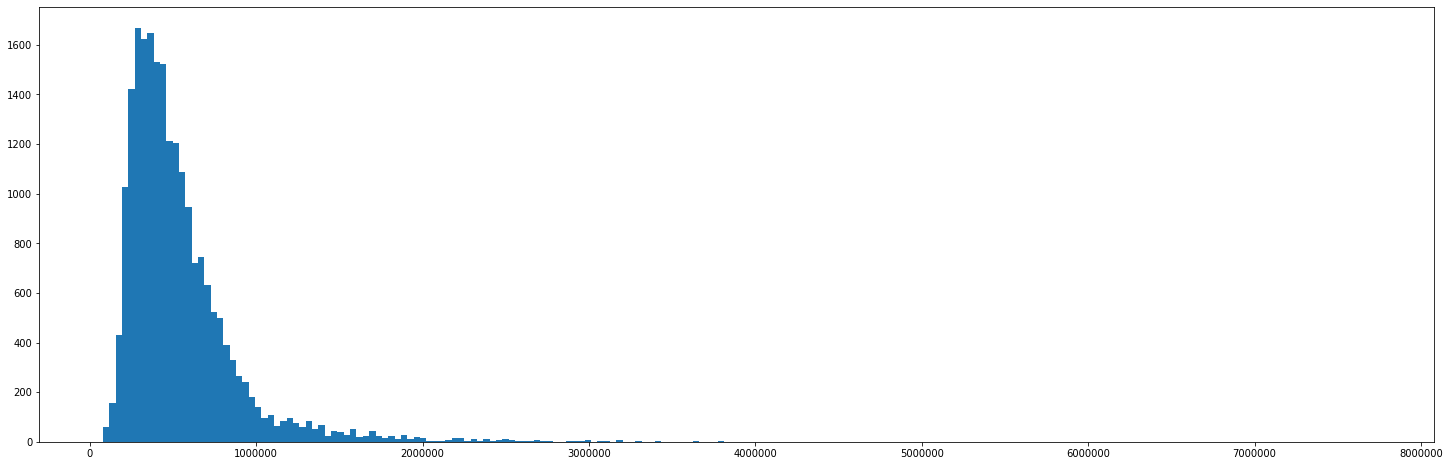

In [37]:
fig, ax = plt.subplots(figsize=(25,8))
ax=plt.hist(df['price'], bins=200)
plt.show()

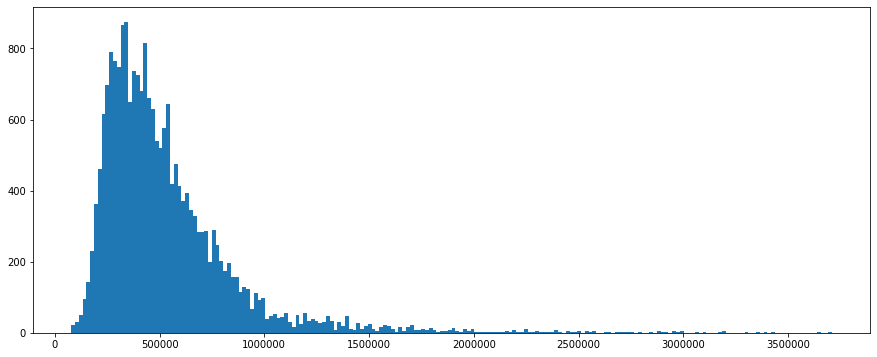

In [38]:
fig, ax = plt.subplots(figsize=(15,6))
ax=plt.hist(df_no_outliers['price'], bins=200,)
plt.show()

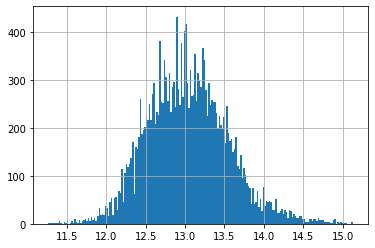

In [39]:
price = df_no_outliers.loc[:,'price']
log_price = np.log(price)
log_price.hist(bins=200)
plt.show()

# Bu grafigi duzelt, ustteki iki grafige grid ekle, log transformation ve outlier atma ise yaradi mi acikla

# Burada K-S test yapip yapmayacagina karar ver. Yapmayacaksan acikla.

### Df_medium_income


In [40]:
# df_medium_income=df.drop(df[df.price > 2000000].index)
# df_medium_income

In [41]:
# fig, ax = plt.subplots(figsize=(14,8))
# sns.distplot(df_medium_income['price'], bins=70,color='red' )
# # ax = sns.distplot(x, rug=True, rug_kws={"color": "g"},
# #     ...                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
# #     ...                   hist_kws={"histtype": "step", "linewidth": 3,
# #     ...                             "alpha": 1, "color": "g"})
# plt.show()

In [42]:
# fig, ax = plt.subplots(figsize=(14,8))
# sns.violinplot(ax=ax, data=df_medium_income['price'])
# plt.show()

### sqft_lot15

In [43]:
# fig, ax = plt.subplots(figsize=(15,8))
# ax=plt.hist(df['sqft_lot15'], bins=100)

# plt.show()

In [44]:
# fig, ax = plt.subplots(figsize=(15,8))
# ax=plt.hist(df_medium_income['sqft_lot15'], bins=100)
# plt.show()

In [45]:
# fig, ax = plt.subplots(figsize=(15,8))
# ax=plt.hist(df_medium_income['sqft_lot15'], bins=100)
# plt.show()

In [46]:
# df_medium_sqft_lot15=df.drop(df[df['sqft_lot15'] > 30000].index)
# df_medium_sqft_lot15



In [47]:
# fig, ax = plt.subplots(figsize=(20,8))
# ax=plt.hist(df_medium_sqft_lot15['sqft_lot'], bins=100)
# plt.show()

In [48]:
# fig, ax = plt.subplots(figsize=(15,12))
# ax=sns.violinplot(ax=ax, data=df['sqft_lot'])
# plt.show()

In [49]:
# fig, ax = plt.subplots(figsize=(15,12))
# sns.violinplot(ax=ax, data=df_medium_income['sqft_lot'])
# plt.show()

In [50]:
# df['sqft_lot15'].sort_values().tail(5)

In [51]:
# df_medium_income['sqft_lot15'].sort_values().tail()

In [52]:

# z=stats.zscore(df)
# # z = np.abs(stats.zscore(df))
# print(z)


## Normalizing the Data

In [53]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [54]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']:
    df[feat] = norm_feat(df[feat])
df.describe()

KeyError: 'sqft_living'

## Visual Explorations into Multicollinearity

In [ ]:
# df_target = df_no_outliers.loc['price']
df_pred =df_no_outliers.drop(['price'],axis=1 )
plt.figure(figsize=(20,20))
ax=sns.heatmap(df_pred.corr(), center=0, linewidths=.5,annot=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [ ]:
df_pred.head(100)

In [ ]:
plot_df=df_no_outliers.drop(['floors','waterfront','view','condition','grade','price','yr_renovated','zipcode', 'lat','long'],axis=1)

In [ ]:
plt.figure(figsize=(12,12))
corr = plot_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool),k=1)
cmap = sns.diverging_palette(200, 10, as_cmap=True, center='light')
ax=sns.heatmap(corr, center=0, linewidths=2,annot=True,cmap=cmap,mask=mask);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [ ]:
sns.pairplot(plot_df)

In [ ]:
df_pred.corr() > 0.75


In [ ]:
df.drop(['lat', 'long', 'zipcode', 'bathrooms', 'sqft_above', 'sqft_living15', 'yr_renovated'], axis=1, inplace=True)
df

## notes


basement to new feature

Check placeholders+

subsampling

regularisation 



future work garaj pool var mi data

## web sites
hexbins with longitude and latitude 
https://medium.com/@mattheweparker/visualizing-data-with-hexbins-in-python-39823f89525e  

categorigal data 
https://medium.com/@rabinpoudyal1995/encoding-categorical-data-in-python-fab150d6e21b

All houses are sold within 390 days, therefore I will not need to adjust the price.
https://github.com/Burton-David/KingsCountyHousingLR/blob/master/student.ipynb



33 odali evi duzelt

In [ ]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']:
    df[feat] = norm_feat(df[feat])
df.describe()

In [ ]:
df.to_csv("Lego_dataset_cleaned.csv", index=False)